# Human immune response to infectious disease

Unos modelos dinámicos.

In [1]:
# Para hacer experimentos numéricos importamos numpy
import numpy as np

# y biblioteca para plotear
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# cómputo simbólico con sympy
from sympy import *
# init_printing(use_latex='matplotlib')  # en emacs
init_printing()

## Linfocitos sin virus

In [2]:
Lamda1, Lamda2, mu1, mu2, a1, a2, b1, b2, E1, E2 = symbols('Lamda1 Lamda2 mu1 mu2 a1 a2 b1 b2 E1 E2')

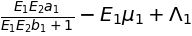

In [3]:
dE1 = Lamda1 - mu1 * E1 + (a1 * E1 * E2)/(1 + b1 * E1 * E2)
dE1

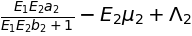

In [4]:
dE2 = Lamda2 - mu2 * E2 + (a2 * E1 * E2)/(1 + b2 * E1 * E2)
dE2

## Búsqueda de Equilibrios

### Abuso del cómputo simbólico

Los objetos creados dE1 y dE2 contienen operaciones representadas simbólicamente que conjugan todas las variables del sistema. Imprimirlas reconstruye las ecuaciones en su notación matemática, a partir de las expresiones simbólicas de Python. Para lograrlo hay que declararle a Python cuáles símbolos componen las expresiones matemáticas. Esto permite hacer operaciones simbólicas sobre las expresiones, como resolver, derivar, sustituir.

Todas las magnitudes del modelo se representan en las ecuaciones por símbolos, como $\Lambda_{1}, \mu_{2}, a{1}$, etc. 

Por otro lado, las expresiones simbólicas dE1 y dE2 se pueden convertir en funciones ejecutables, pero estos símbolos no son argumentos de las funciones dE1 y dE2, se asume que serán constantes y que las únicas variables con cambios serán E1 y E2.

En el intento que sigue de encontrar algebráicamente los equilibrios del sistema, he incluido como símbolos todas esas constantes del sistema. Mi esperanza era usar operaciones de SymPy hasta tener una expresión simbólica que volver ejecutable, y sólo entonces alimentarle valores numéricos al modelo computacional.

Es que es una mala práctica de programación incluir en el código "números mágicos". O sea: números en medio de expresiones matemáticas, sin explicación, e.g.: 

    a = 3.14159 * r**2
    
Es mejor estilo escribir

    pi = 3.141592
    a = pi * r**2

Pero cada símbolo es una variable para SymPy, y el intento de encontrar soluciones al sistema de ecuaciones con tantas variables genera expresiones ilegibles.

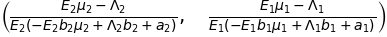

In [5]:
# resolver dE2 para E1, viceversa
e1 = solve(dE2, E1)[0]
e2 = solve(dE1, E2)[0]
e1, e2

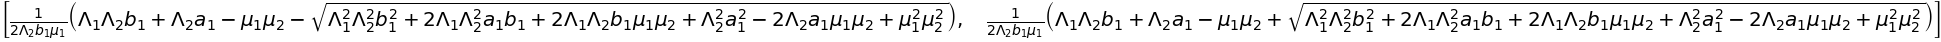

In [6]:
# sustituir una de las expresiones de la celda anterior en una de las expresiones originales, resolver
static_e1 = solve(e1.subs(E2, e2), E1)
static_e1

Esto es una barbaridad, un error. A continuación cómo lo resolví.


### Sustituir magnitudes al crear las expresiones simbólicas

Si declaro antes, ya no son números mágicos. Al crear las expresiones se interpolarán los valores numéricos así que las expresiones simbólicas serán simples: SymPy hace la aritmética necesaria para simplificar, lo que le era imposible con tanto símbolo.

In [7]:
# borro las variables previas, para quitarles lo simbólico
del(Lamda1, Lamda2, mu1, mu2, a1, a2, b1, b2, E1, E2, dE1, dE2)

# variables simples de Python
Lamda1 = 1
Lamda2 = 1
mu1 = 1.25
mu2 = 1.25
a1 = 0.252
a2 = 0.252
b1 = 0.008
b2 = 0.008

# esta vez sólo dos símbolos
E1, E2 = symbols('E1 E2')

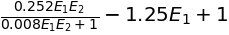

In [8]:
dE1 = Lamda1 - mu1 * E1 + (a1 * E1 * E2)/(1 + b1 * E1 * E2)
dE1

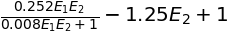

In [9]:
dE2 = Lamda2 - mu2 * E2 + (a2 * E1 * E2)/(1 + b2 * E1 * E2)
dE2

¡Mucho mejor! Ahora sí:

### Búsqueda de los equilibrios

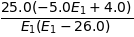

In [10]:
e2 = solve(dE1, E2)[0]
e2

In [11]:
solve(dE2.subs({E2: e2}), E1)

## Jacobiana


In [12]:
J = symbols("J")

J = Matrix([[diff(dE1, E1), diff(dE1, E2)], 
            [diff(dE2, E1), diff(dE2, E2)]])
J

⎡                 2                                              2            
⎢   0.002016⋅E₁⋅E₂          0.252⋅E₂                  0.002016⋅E₁ ⋅E₂         
⎢- ────────────────── + ─────────────── - 1.25     - ────────────────── + ────
⎢                   2   0.008⋅E₁⋅E₂ + 1                               2   0.00
⎢  (0.008⋅E₁⋅E₂ + 1)                                 (0.008⋅E₁⋅E₂ + 1)        
⎢                                                                             
⎢                    2                                        2               
⎢      0.002016⋅E₁⋅E₂          0.252⋅E₂            0.002016⋅E₁ ⋅E₂         0.2
⎢   - ────────────────── + ───────────────      - ────────────────── + ───────
⎢                      2   0.008⋅E₁⋅E₂ + 1                         2   0.008⋅E
⎣     (0.008⋅E₁⋅E₂ + 1)                           (0.008⋅E₁⋅E₂ + 1)           

               ⎤
0.252⋅E₁       ⎥
───────────    ⎥
8⋅E₁⋅E₂ + 1    ⎥
               ⎥
               ⎥
               ⎥
52⋅E₁      

### Evaluada en los puntos de equilibrio

#### (1,1) un sumidero

In [13]:
Je1 = J.subs({E1: 1, E2:1})
Je1

⎡-1.00198412698413  0.248015873015873⎤
⎢                                    ⎥
⎣0.248015873015873  -1.00198412698413⎦

In [14]:
Je1.det(), Je1.trace()

#### (5, 5) un punto de ensilladura

In [15]:
Je2 = J.subs({E1: 5, E2:5})
Je2

⎡-0.375  0.875 ⎤
⎢              ⎥
⎣0.875   -0.375⎦

In [16]:
Je2.det(), Je2.trace()

#### (20, 20) otro sumidero

In [17]:
Je3 = J.subs({E1: 20, E2: 20})
Je3

⎡-0.964285714285714  0.285714285714286 ⎤
⎢                                      ⎥
⎣0.285714285714286   -0.964285714285714⎦

In [18]:
Je3.det(), Je3.trace()

## Campos de vectores

In [19]:
del(Lamda1, Lamda2, mu1, mu2, a1, a2, b1, b2, E1, E2, dE1, dE2)

def dE1(E1, E2):
    return Lamda1 - mu1 * E1 + (a1 * E1 * E2)/(1 + b1*E1*E2)

def dE2(E1, E2):
    return Lamda2 - mu2 * E2 + (a2 * E1 * E2)/(1 + b2*E1*E2)

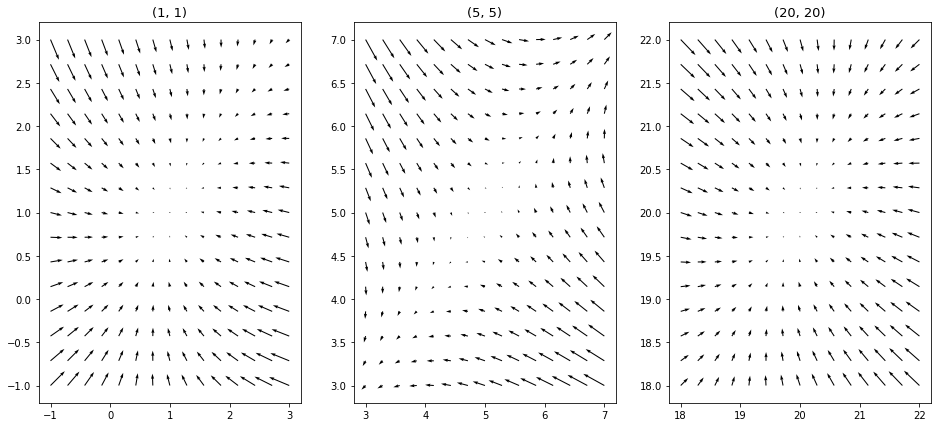

In [20]:
Lamda1 = 1
Lamda2 = 1
mu1 = 1.25
mu2 = 1.25
a1 = 0.252
a2 = 0.252
b1 = 0.008
b2 = 0.008

plt.figure(figsize=(16, 7))
s = 1
for eq in [(1,1), (5,5), (20,20)]:
    ax = plt.subplot(1, 3, s)
    s += 1
    ax.set_title("(%s, %s)" % eq, fontsize=13)
    
    i, j = np.meshgrid(np.linspace(eq[0] - 2,
                                   eq[0] + 2, 15),
                       np.linspace(eq[1] - 2,
                                   eq[1] + 2, 15))

    u = dE1(i, j)
    v = dE2(i, j)

    plt.quiver(i, j, u, v)



## Trayectorias

In [21]:
def step(x, y, dt, f, g):
    return (x + dt * f(x, y),
             y + dt * g(x, y))

def trayectoria(x0, y0, f, g, dt=0.01, steps=100):
    x = x0
    y = y0
    t = list()
    for n in range(steps):
        t.append((x, y))
        x, y = step(x, y, dt, f, g)
    return t

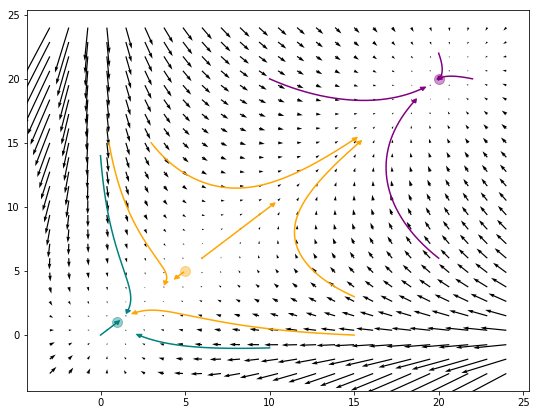

In [22]:
def linea(E1_0, E2_0, dt=0.1, steps=300, color='teal'):
    E1, E2 = zip(*[coord for coord in
                   trayectoria(E1_0, E2_0, dE1, dE2, dt, steps)])
    plt.plot(E1, E2, color=color)
    plt.arrow(E1[-2], E2[-2],E1[-1] - E1[-2], E2[-1] - E2[-2],
               color=color, head_width=0.3, head_length=0.3)


i, j = np.meshgrid(np.linspace(-3, 24, 25),
                   np.linspace(-3, 24, 25))

u = dE1(i, j)
v = dE2(i, j)

fig = plt.figure(figsize=(9,7))
plt.quiver(i, j, u, v)

linea(0,0, dt=0.01)
linea(0,14, dt=0.01)
linea(10,-1, dt=0.01, steps=120)

linea(3, 15, dt=0.01, color='orange')
linea(0.5, 15, dt=0.01, color='orange')
linea(15, 3, dt=0.01, color='orange')
linea(15, 0, dt=0.01, color='orange')
linea(6, 6, dt=0.01, color='orange')
linea(4.9, 4.9, dt=0.01, color='orange')

linea(22, 20, dt=0.01, color='purple')
linea(20, 22, dt=0.01, color='purple')
linea(10, 20, dt=0.01, color='purple')
linea(20, 6, dt=0.01, color='purple')

plt.plot(1, 1, 'teal', marker='o', markersize=10, alpha=0.4)
plt.plot(5, 5, 'orange', marker='o', markersize=10, alpha=0.4)
plt.plot(20, 20, 'purple', marker='o', markersize=10, alpha=0.4)

plt.show()

### Tamaños de población al paso del tiempo

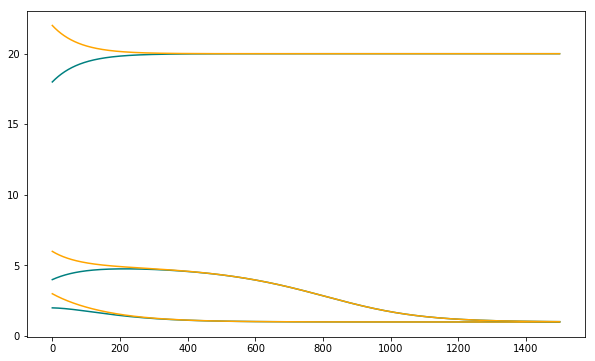

In [23]:
fig = plt.figure(figsize=(10, 6))

def pop(E1_0, E2_0, steps = 1500):
    e1t = [E1_0, ] + np.zeros(steps)
    e2t = [E2_0, ] + np.zeros(steps)

    dt = 0.01
    for t in range(1, steps):
        e1t[t] = e1t[t-1] + dt * dE1(e1t[t-1], e2t[t-1])
        e2t[t] = e2t[t-1] + dt * dE2(e1t[t-1], e2t[t-1])

    plt.plot(range(steps), e1t, color='teal')
    plt.plot(range(steps), e2t, color='orange')

pop(2, 3)
pop(4,6)
pop(18,22)

# En presencia del Virus

In [24]:
def dE1(E1, E2, V):
    return Lamda1 - mu1 * E1 + (a1 * E1 * E2)/(1 + b1*E1*E2) + K*V*E1

def dE2(E1, E2):
    return Lamda2 - mu2 * E2 + (a2 * E1 * E2)/(1 + b2*E1*E2)

def dV(V, E1):
    return r*V - k*V*E1

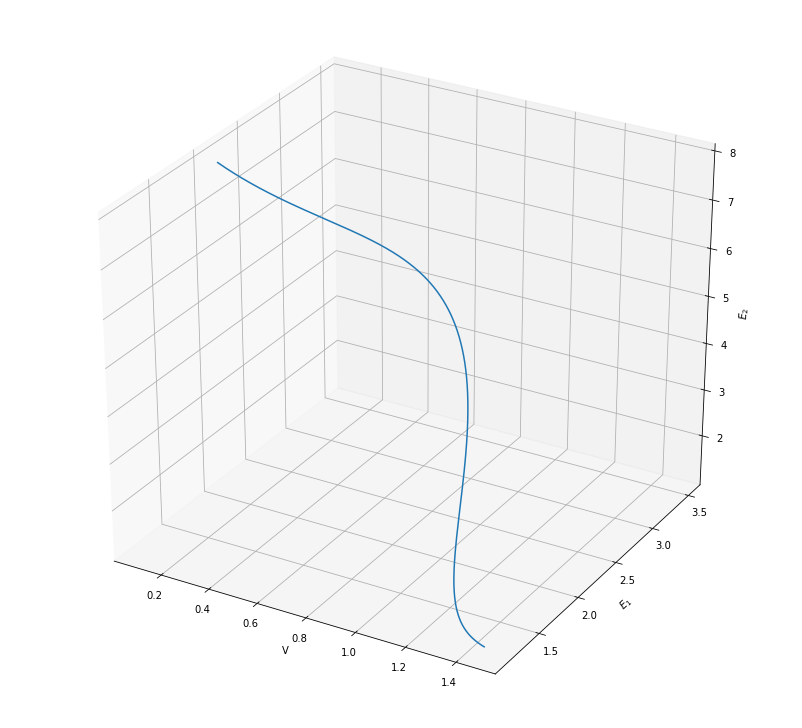

In [25]:
Lamda1 = 1
Lamda2 = 1
mu1 = 1.25
mu2 = 1.25
a1 = 0.252
a2 = 0.252
b1 = 0.008
b2 = 0.008
r = 0.07
k = 0.01
K = 0.05

steps = 10000
e1t = [2, ] + np.zeros(steps)
e2t = [8, ] + np.zeros(steps)
vt = [0.1, ] + np.zeros(steps)
dt = 0.001
for t in range(1, steps):
    e1t[t] = e1t[t-1] + dt * dE1(e1t[t-1], e2t[t-1], vt[t-1])
    e2t[t] = e2t[t-1] + dt * dE2(e1t[t-1], e2t[t-1])
    vt[t] = vt[t-1] + dt * dV(e1t[t-1], vt[t-1])

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 13))
#plt.quiver(X=i, Y=j, U=u, V=v, C=w)
ax = fig.gca(projection='3d')
ax.plot(vt, e1t, e2t)
ax.set_xlabel("V")
ax.set_ylabel("$E_{1}$")
ax.set_zlabel("$E_{2}$")
plt.show()


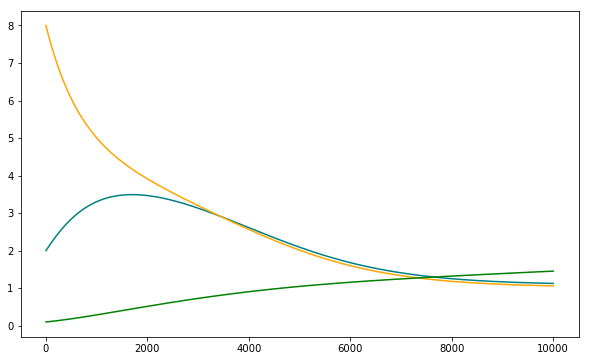

In [26]:
fig = plt.figure(figsize=(10,6))
plt.plot(e1t, color='teal')
plt.plot(e2t, color='orange')
plt.plot(vt, color='green')